In [ ]:
class Node:
    def __init__(self, next=None, prev=None, cylinder=None):
        self.next = next
        self.prev = prev
        self.cylinder = cylinder

def create_list(fname, schedule):
    with open(fname, 'r') as file:
        for line in file:
            schedule.append(int(line))

def insert_and_get_idx(schedule, val):
    idx = 0
    #base case where insert into first element
    if schedule[0] > val:
        schedule.insert(0, val)
        return idx

    for i in range(len(schedule)):
        if schedule[i] > val:
            schedule.insert(i, val)
            return i

    schedule.append(val)
    return (len(schedule) - 1)


In [ ]:
def FCFS(schedule, start):
    total = abs(start - schedule[0])
    #idx = insert_and_get_idx(schedule, start)
    idx = 0
    with open("fcfsPY.csv", "w") as file:
        while idx + 1 < len(schedule):
            file.write(str(schedule[idx]))
            file.write(",")
            total = total + abs(schedule[idx] - schedule[idx + 1])
            idx = idx + 1
        file.write(str(schedule[idx]))
    file.close()
    return total

In [3]:
#shortest seek time first
def SSTF(schedule, start):
    idx = insert_and_get_idx(schedule, start)
    total = 0
    with open("sstfPY.csv", "w") as file:
        while len(schedule) > 0:
            if len(schedule) == 1: #case where there is only one element left
                file.write(str(schedule[0]))
                file.close()
                del schedule[0]
                return total
            elif idx + 1 == len(schedule): #case where we have hit the far right
                file.write(str(schedule[idx]))
                file.write(",")
                total = total + abs(schedule[idx] - schedule[idx - 1])
                del schedule[idx]
                idx = idx - 1
            elif idx - 1 < 0: #
                file.write(str(schedule[idx]))
                file.write(",")
                total = total + abs(schedule[idx] - schedule[idx + 1])
                del schedule[idx]
            else:
                #case right is bigger and elems on both side of idx
                if abs(schedule[idx] - schedule[idx + 1]) <= abs(schedule[idx] - schedule[idx - 1]):
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx + 1])
                    del schedule[idx]
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx - 1])
                    del schedule[idx]
                    idx = idx - 1

    return total

In [4]:
#go towards closest end from start and bounce back
def SCAN(schedule, start, num_cylinder):
    idx = insert_and_get_idx(schedule, start)
    total = 0
    with open("scanPY.csv", "w") as file:
        #start closer to left end so go left
        if (abs(0 - schedule[idx]) <= abs(schedule[len(schedule) - 1] - schedule[idx])):
            insert_and_get_idx(schedule, 0)
            idx = idx + 1
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx - 1 < 0:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx + 1])
                    del schedule[idx]
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx - 1])
                    del schedule[idx]
                    idx = idx - 1
        else:
            #start is closer to right so insert sentinel value at end
            insert_and_get_idx(schedule, num_cylinder - 1)
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx + 1 == len(schedule):
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx - 1])
                    del schedule[idx]
                    idx = idx - 1
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx + 1])
                    del schedule[idx]

    file.close()
    return total


In [5]:
#bounded version of SCAN (doesn't go to end 0 or end possible cylinder)
def LOOK(schedule, start):
    idx = insert_and_get_idx(schedule, start)
    total = 0
    with open("lookPY.csv", "w") as file:
        if (abs(schedule[0] - schedule[idx]) <= abs(schedule[len(schedule) - 1] - schedule[idx])):
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx - 1 < 0:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx + 1])
                    del schedule[idx]
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx - 1])
                    del schedule[idx]
                    idx = idx - 1
        else:
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx + 1 == len(schedule):
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx - 1])
                    del schedule[idx]
                    idx = idx - 1
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx + 1])
                    del schedule[idx]

    file.close()
    return total

In [6]:
def CSCAN(schedule, start, num_cylinder):
    idx = insert_and_get_idx(schedule, start)
    total = 0
    end = num_cylinder - 1
    with open("cscanPY.csv", "w") as file:
        #default circle left
        if (abs(0 - schedule[idx]) <= abs(schedule[len(schedule) - 1] - schedule[idx])):
            insert_and_get_idx(schedule, num_cylinder - 1)
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx - 1 < 0:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + schedule[idx]
                    del schedule[idx]
                    idx = len(schedule) - 1
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx - 1])
                    del schedule[idx]
                    idx = idx - 1
        else:
            #default circle right
            insert_and_get_idx(schedule, 0)
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx + 1 == len(schedule):
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(end - total)
                    del schedule[idx]
                    idx = 0
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx + 1])
                    del schedule[idx]

    file.close()
    return total

In [7]:
#circulur version of scan, directionality determined by initial closest end to start


#bounded circular version of SCAN
def CLOOK(schedule, start, num_cylinder):
    idx = insert_and_get_idx(schedule, start)
    total = 0
    end = num_cylinder - 1
    with open("clookPY.csv", "w") as file:
        #default circle left
        if (abs(schedule[0] - schedule[idx]) <= abs(schedule[len(schedule) - 1] - schedule[idx])):
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx - 1 < 0:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    del schedule[idx]
                    idx = len(schedule) - 1
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx - 1])
                    del schedule[idx]
                    idx = idx - 1
        else:
            #default circle right
            while len(schedule) > 0:
                if len(schedule) == 1:
                    file.write(str(schedule[0]))
                    del schedule[0]
                elif idx + 1 == len(schedule):
                    file.write(str(schedule[idx]))
                    file.write(",")
                    del schedule[idx]
                    idx = 0
                else:
                    file.write(str(schedule[idx]))
                    file.write(",")
                    total = total + abs(schedule[idx] - schedule[idx + 1])
                    del schedule[idx]

    file.close()
    return total

In [ ]:

schedule = []
visit = []
mode = input("Please enter 1 for user interactive mode or 2 for batch mode or any other for default mode:\n")
if mode != "1" and mode != "2":
    schedule = [98, 183, 37, 122, 14, 124, 65, 67]
    num_cylinder = 200
    start = 53

else:
#     num_cylinder = int(input("Enter total cylinders: "))
#     start = int(input("Enter starting position of disk head: "))
    num_cylinder = 200
    start = 100
    size = int(input("Enter size of list: "))
    if mode == "1":
        #create list in either interactive mode or batch mode
        print("Enter the cylinder values:\n")
        for i in range(size):
            position = int(input())
            schedule.append(position)
    elif mode == "2":
        create_list(input("Please enter name of file: "), schedule)


print("Disk Queue =")
print(schedule)



In [248]:
outfile = open(input("enter name of outfile"), "w")    

enter name of outfileoneClusterRun4


In [249]:
#FCFS
fcfsList = schedule.copy()
fcfsSum = FCFS(fcfsList, start)
print("First Come First Serve Algorithm")
print("FCFS =", fcfsSum)
outfile.write("FCSF = " + str(fcfsSum) + "\n")

    

First Come First Serve Algorithm
FCFS = 1181


12

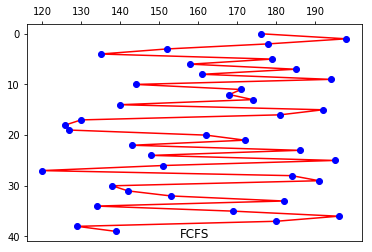

In [250]:
import matplotlib.pyplot as plt
import numpy as np



with open("fcfsPY.csv") as inf:
        list1= [int(i) for i in inf.read().split(',')]

l=len(list1)    
list2 = []
for i in range(l):
    list2.append(i)
    
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
ax=plt.gca()
ax.invert_yaxis()
plt.xticks(np.arange(0, max(list1)+1, 10))
plt.yticks(np.arange(0, max(list1)+1, 10))
plt.plot(list1,list2,'r-',list1,list2,'bo')
plt.title("FCFS", y=-0.01)
plt.show()


In [251]:
#SSTF
sstfList = schedule.copy()
sstfList.sort()
sstfSum = SSTF(sstfList, start)
print("Shortest Seek Time First Algorithm")
print("SSTF =", sstfSum)
outfile.write("SSTF = " + str(sstfSum) + "\n")

    

Shortest Seek Time First Algorithm
SSTF = 98


10

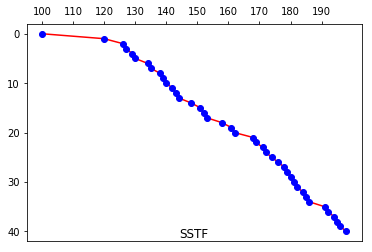

In [252]:
with open("sstfPY.csv") as inf:
        list1= [int(i) for i in inf.read().split(',')]

l=len(list1)    
list2 = []
for i in range(l):
    list2.append(i)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
ax=plt.gca()
ax.invert_yaxis()
plt.xticks(np.arange(0, max(list1)+1, 10))
plt.yticks(np.arange(0, max(list1)+1, 10))
plt.plot(list1,list2,'r-',list1,list2,'bo')
plt.title("SSTF", y=-0.01)
plt.show()

In [253]:
#SCAN
scanList = schedule.copy()
scanList.sort()
scanSum = SCAN(scanList, start, num_cylinder)
print("SCAN Algorithm")
print("SCAN =", scanSum)
outfile.write("SCAN = " + str(scanSum) + "\n")

    

SCAN Algorithm
SCAN = 99


10

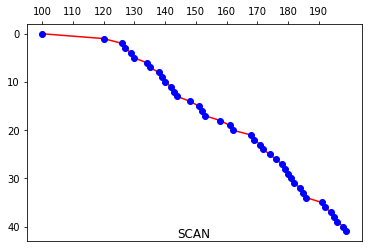

In [254]:
with open("scanPY.csv") as inf:
        list1= [int(i) for i in inf.read().split(',')]

l=len(list1)    
list2 = []
for i in range(l):
    list2.append(i)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
ax=plt.gca()
ax.invert_yaxis()
plt.xticks(np.arange(0, max(list1)+1, 10))
plt.yticks(np.arange(0, max(list1)+1, 10))
plt.plot(list1,list2,'r-',list1,list2,'bo')
plt.title("SCAN", y=-0.01)
plt.show()

In [255]:
#LOOK
lookList = schedule.copy()
lookList.sort()
lookSum = LOOK(lookList, start)
print("LOOK Algorithm (bounded SCAN)")
print("LOOK =", lookSum)
outfile.write("LOOK = " + str(lookSum) + "\n")
    

LOOK Algorithm (bounded SCAN)
LOOK = 98


10

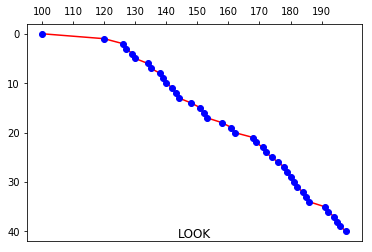

In [256]:
with open("lookPY.csv") as inf:
        list1= [int(i) for i in inf.read().split(',')]

l=len(list1)    
list2 = []
for i in range(l):
    list2.append(i)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
ax=plt.gca()
ax.invert_yaxis()
plt.xticks(np.arange(0, max(list1)+1, 10))
plt.yticks(np.arange(0, max(list1)+1, 10))
plt.plot(list1,list2,'r-',list1,list2,'bo')
plt.title("LOOK", y=-0.01)
plt.show()

In [257]:
#CSCAN
cscanList = schedule.copy()
cscanList.sort()
cscanSum = CSCAN(cscanList, start, num_cylinder)
print("Circular-SCAN Algorithm")
print("CSCAN =", cscanSum)
outfile.write("CSCAN = " + str(cscanSum) + "\n")
    

Circular-SCAN Algorithm
CSCAN = 198


12

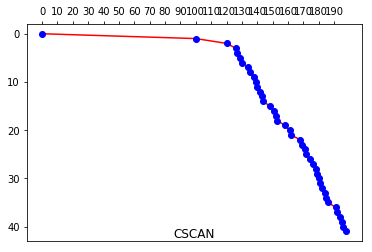

In [258]:
with open("cscanPY.csv") as inf:
        list1= [int(i) for i in inf.read().split(',')]

l=len(list1)    
list2 = []
for i in range(l):
    list2.append(i)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
ax=plt.gca()
ax.invert_yaxis()
plt.xticks(np.arange(0, max(list1)+1, 10))
plt.yticks(np.arange(0, max(list1)+1, 10))
plt.plot(list1,list2,'r-',list1,list2,'bo')
plt.title("CSCAN", y=-0.01)
plt.show()

In [259]:
#CLOOK
clookList = schedule.copy()
clookList.sort()
clookSum = CLOOK(clookList, start, num_cylinder)
print("Circular-LOOK Algorithm (bounded CSCAN)")
print("CLOOK =", clookSum)
outfile.write("CLOOK = " + str(clookSum) + "\n")




Circular-LOOK Algorithm (bounded CSCAN)
CLOOK = 78


11

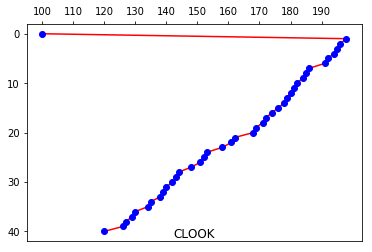

In [260]:
with open("clookPY.csv") as inf:
        list1= [int(i) for i in inf.read().split(',')]

l=len(list1)    
list2 = []
for i in range(l):
    list2.append(i)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
ax=plt.gca()
ax.invert_yaxis()
plt.xticks(np.arange(0, max(list1)+1, 10))
plt.yticks(np.arange(0, max(list1)+1, 10))
plt.plot(list1,list2,'r-',list1,list2,'bo')
plt.title("CLOOK", y=-0.01)
plt.show()

In [261]:
outfile.close()